## Autoencoder

An autoencoder is an unsupervised learning technique for neural networks that learns efficient data representations (encoding) by training the network to ignore signal “noise.” Autoencoders can be used for image denoising, image compression, and, in some cases, even generation of image data.

## Flow of Autoencoder

Input Image -> Encoder -> Compressed Representation -> Decoder -> Reconstruct Input Image

## Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

## Load the Dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# normalize the image data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

## Exploratory Data Analysis

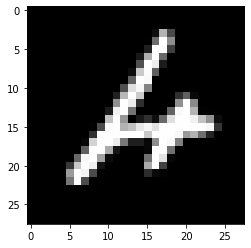

In [5]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

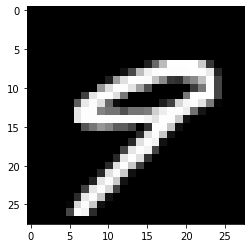

In [6]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

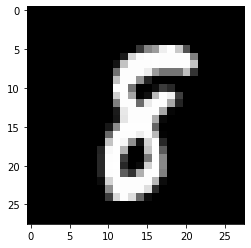

In [7]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

## Model Creation

In [8]:
model = Sequential([
                    # encoder network
                    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(16, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(16, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(32, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 16)       0

2022-07-24 11:50:39.512409: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# train the model
model.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 41s 170ms/step - loss: 0.1798 - val_loss: 0.0875
Epoch 2/20
235/235 [==============================] - 61s 259ms/step - loss: 0.0825 - val_loss: 0.0789
Epoch 3/20
235/235 [==============================] - 49s 209ms/step - loss: 0.0774 - val_loss: 0.0752
Epoch 4/20
235/235 [==============================] - 44s 187ms/step - loss: 0.0753 - val_loss: 0.0737
Epoch 5/20
235/235 [==============================] - 43s 181ms/step - loss: 0.0740 - val_loss: 0.0727
Epoch 6/20
235/235 [==============================] - 50s 215ms/step - loss: 0.0730 - val_loss: 0.0719
Epoch 7/20
235/235 [==============================] - 53s 226ms/step - loss: 0.0723 - val_loss: 0.0713
Epoch 8/20
235/235 [==============================] - 53s 224ms/step - loss: 0.0717 - val_loss: 0.0708
Epoch 9/20
235/235 [==============================] - 49s 208ms/step - loss: 0.0713 - val_loss: 0.0706
Epoch 10/20
235/235 [==============================] - 57s 241ms/step - l

## Visualize the Results

In [10]:
# predict the results from model (get compressed images)
pred = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


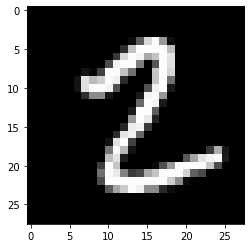

In [11]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

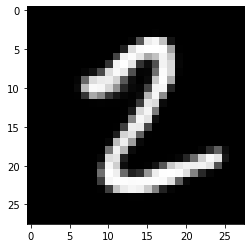

In [12]:
# visualize compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

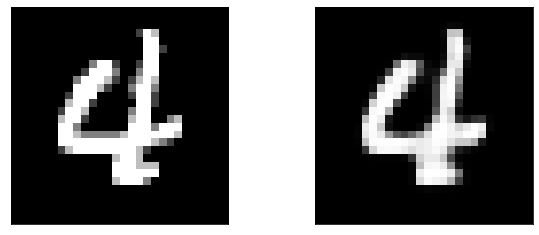

In [13]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

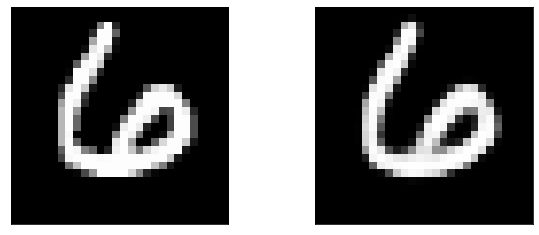

In [14]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

## Performance Metrics

Performance Metrics helps to measure the compression performances. Below are some metrics used to measure the performance of the model.   

In [71]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage import io

In [101]:
def calculate_mse(imageA, imageB):
	return mse(imageA, imageB)

def calculate_psnr(imageA, imageB):
	return psnr(imageA, imageB)

def calculate_ssim(imageA, imageB):
	return ssim(imageA, imageB)

def compression_ratio(original, compressed):
	return (original.size) / (compressed.size)

def compare_images(original, compressed, title):
	# compute the mean squared error, peak signal noise ratio and structural similarity

	fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True, sharey=True)
	ax = axes.ravel()

	# setup the figure
	ax[0].imshow(original, cmap=plt.cm.gray)
	ax[0].set_xlabel(f'MSE: {calculate_mse(original,original):.3f}, SSIM: {calculate_ssim(original,original):.3f}')
	ax[0].set_title('Original image')

	ax[1].imshow(compressed, cmap=plt.cm.gray)
	ax[1].set_xlabel(f'MSE: {calculate_mse(original,compressed):.3f}, PSNR: {calculate_psnr(original,compressed):.3f}, SSIM: {calculate_ssim(original,compressed):.3f}')
	ax[1].set_title('Compressed image')

	plt.show()

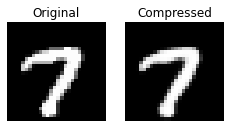

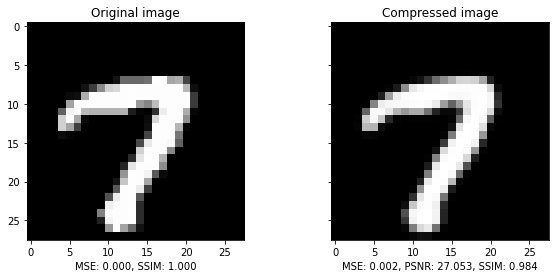

784
784
1.0000


In [103]:
# initialize the figure
fig = plt.figure("Images")
index  = np.random.randint(len(x_test))
original = np.squeeze(x_test[index].reshape(28,28))
compressed = np.squeeze(pred[index].reshape(28,28))
images = ("Original", original), ("Compressed", compressed)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()

#compare image quality
compare_images(original, compressed, "Original vs. Compressed")

#calculate compression ratio
cr = "{:.4f}".format(compression_ratio(original, compressed))
print(cr)